Data aquired from https://www.kaggle.com/datasets/shashwatwork/depression-and-mental-health-data-analysis/data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # for data viz for handling outliers
import matplotlib.pyplot as plt # for data viz
import scipy.stats as stats
import os

In [4]:
# change directory to data folder
print(os.getcwd())
#os.listdir()
# os.chdir('..')

c:\Users\erict\Downloads\Courses\Spring 2025\INST414\414 project


In [5]:
# read in my dataset
df = pd.read_csv("data/processed/Mental_Health_Dataset.csv")

In [37]:
# Check the first few rows of the dataframe
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [8]:
# remove the timestamp column
df = df.drop(columns=["Timestamp"])
# Check the first few rows of the dataframe 
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [6]:
# check for null values
df.isnull().sum()
# impute the missing self_employed values with "No"
df["self_employed"].fillna("No", inplace=True)
# check for null values again
df['self_employed'].value_counts()

C:\Users\erict\AppData\Local\Temp\ipykernel_31028\2612641051.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["self_employed"].fillna("No", inplace=True)


self_employed
No     263196
Yes     29168
Name: count, dtype: int64

In [40]:
# Summary statistics of the filtered dataset
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,239850,171308,66351,263196,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


Observations
Age:
After filtering, there is only one age-group as to be expected.

Gender:
There are two genders (presumably male and female). The most frequent gender is "Female," with 110 occurrences.

Occupation:
There are five occupation categories. The most frequent occupation is "Student," with 53 occurrences.

Days Indoors:
There are five categories indicating the number of days spent indoors. The most frequent category is "Go out Everyday" with 53 occurrences.

Growing Stress:
There are three categories indicating the presence of growing stress. The most frequent response is "Yes," with 76 occurrences.

Quarantine Frustrations:
There are three categories indicating the presence of quarantine frustrations. The most frequent response is "Yes," with 90 occurrences.

Changes in Habits:
There are three categories indicating whether there have been changes in habits. The most frequent response is "Yes," with 75 occurrences.

Mental Health History:
There are three categories related to mental health history. The most frequent response is "Maybe," with 80 occurrences.

Weight Change:
There are three categories indicating whether there has been a weight change. The most frequent response is "No," with 80 occurrences.

Mood Swings:
There are three categories indicating the presence of mood swings. The most frequent response is "Low," with 79 occurrences.

Coping Struggles:
There are two categories indicating coping struggles. The most frequent response is "Yes," with 106 occurrences.

Work Interest:
There are three categories related to work interest. The most frequent response is "Maybe," with 77 occurrences.

Social Weakness:
There are three categories indicating social weakness. The most frequent response is "Maybe," with 85 occurrences.

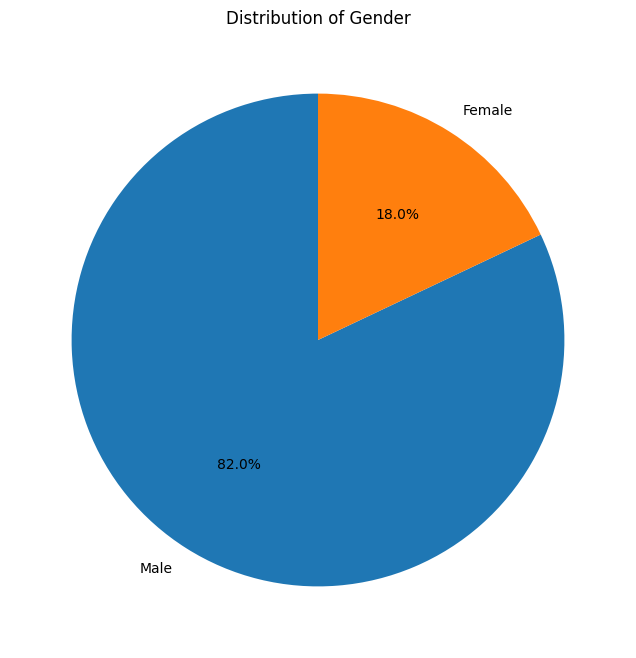

In [41]:
# Pie chart for the distribution of Gender in the filtered dataset
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Gender')
plt.ylabel('')  

plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_17472\3763910539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=df, palette='viridis')


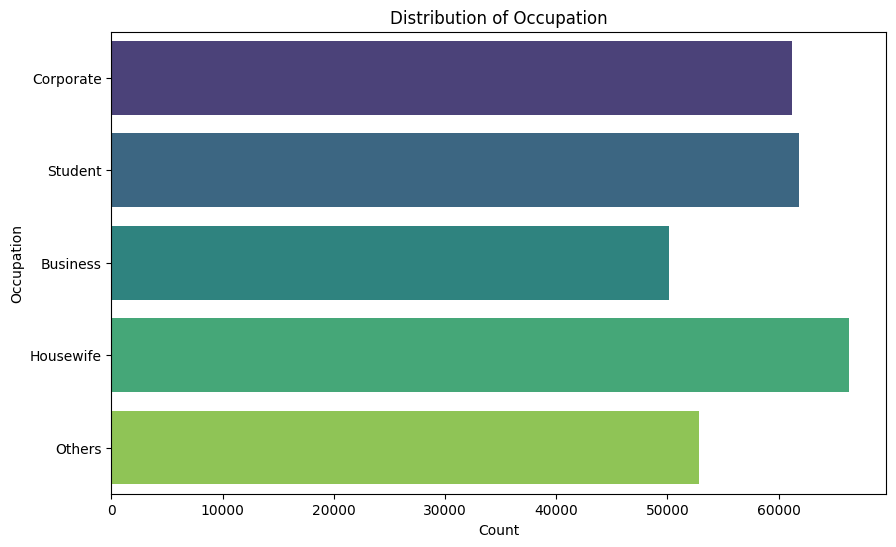

In [42]:
# Countplot for the distribution of Occupation in the filtered dataset
plt.figure(figsize=(10, 6))

sns.countplot(y='Occupation', data=df, palette='viridis')
plt.title('Distribution of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_17472\3282873826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Growing_Stress', data=df, palette='viridis')


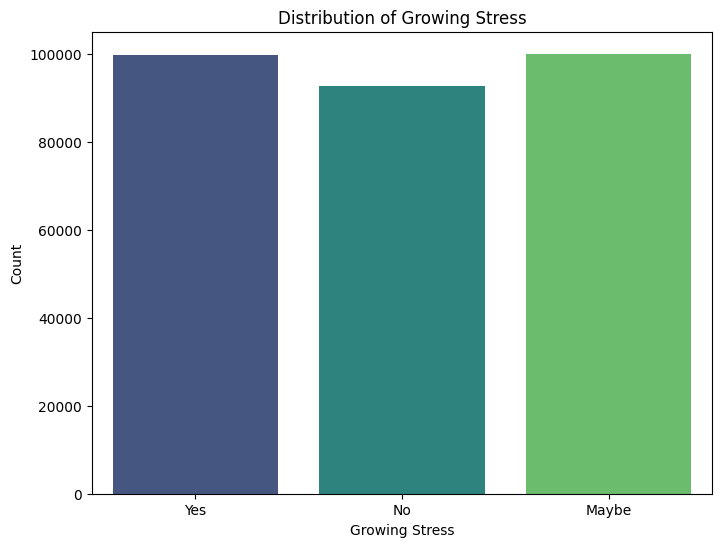

In [44]:
# Bar plot for the distribution of growing stress in the filtered dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Growing_Stress', data=df, palette='viridis')
plt.title('Distribution of Growing Stress')
plt.xlabel('Growing Stress')
plt.ylabel('Count')
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_17472\3395880154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mental_Health_History', data=df, palette='viridis')


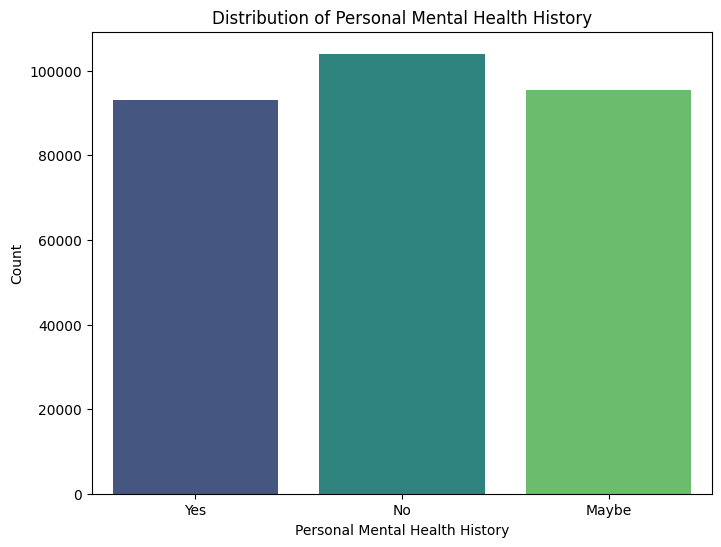

In [45]:
# Bar plot for the distribution of Weight Change in the filtered dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental_Health_History', data=df, palette='viridis')
plt.title('Distribution of Personal Mental Health History')
plt.xlabel('Personal Mental Health History')
plt.ylabel('Count')
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_17472\2568697310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Coping_Struggles', data=df, palette='viridis')


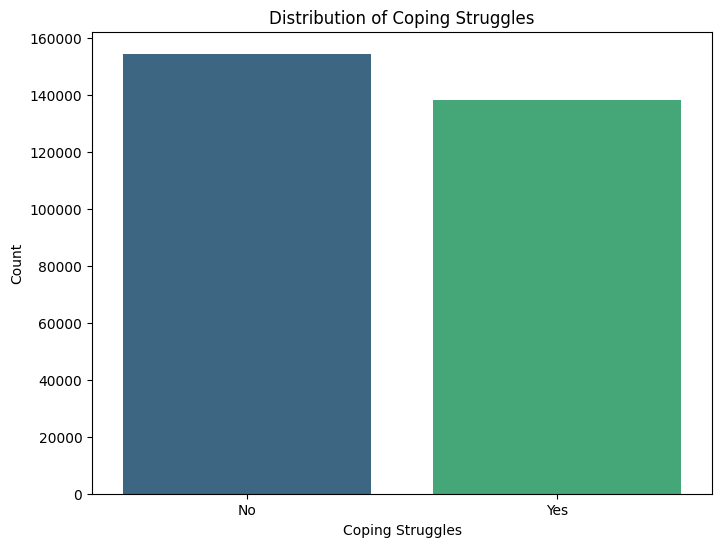

In [46]:
# Distribution of coping struggles
plt.figure(figsize=(8, 6))
sns.countplot(x='Coping_Struggles', data=df, palette='viridis')
plt.title('Distribution of Coping Struggles')
plt.xlabel('Coping Struggles')
plt.ylabel('Count')
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_17472\666275591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mood_Swings', data=df, palette='viridis')


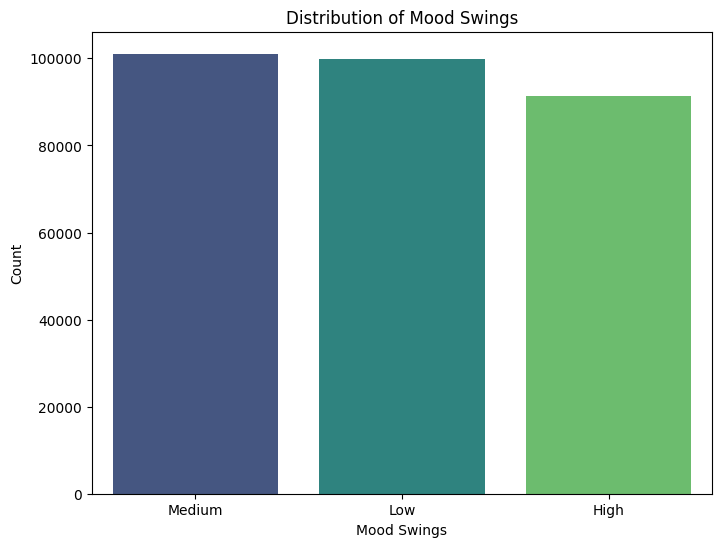

In [47]:
# Bar plot for distribution of mood swings
plt.figure(figsize=(8, 6))
sns.countplot(x='Mood_Swings', data=df, palette='viridis')
plt.title('Distribution of Mood Swings')
plt.xlabel('Mood Swings')
plt.ylabel('Count')
plt.show()

In [48]:
contingency_table = pd.crosstab(df['Occupation'], df['Growing_Stress'])

# Perform Chi-Square Test for occupation and growing stress
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 3560.398894133638, p-value: 0.0


In [49]:
contingency_table = pd.crosstab(df['Coping_Struggles'], df['Mental_Health_History'])

# Perform Chi-Square Test for coping struggles and mental health history
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 729.6179084536424, p-value: 3.676920419230136e-159


In [50]:
contingency_table = pd.crosstab(df['Mood_Swings'], df['Growing_Stress'])

# Perform Chi-Square Test for mood swings and growing stress
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 1334.131411640537, p-value: 1.323927105497502e-287


In [51]:
contingency_table = pd.crosstab(df['Mental_Health_History'], df['Growing_Stress'])

# Perform Chi-Square Test for mental health history and growing stress
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 310.83225029432833, p-value: 4.987879727729424e-66


In [53]:
contingency_table = pd.crosstab(df['Coping_Struggles'], df['Mood_Swings'])

# Perform Chi-Square Test for coping struggles and mood swings
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 481.31994780477555, p-value: 3.0387944126854228e-105


In [54]:
# Followup analysis: Cramer's V for the association between coping struggles and mood swings
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.040574668747623055


In [55]:
# Cramer V for Mental Health History and Growing Stress
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))
print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.040574668747623055


In [56]:
# Cramer V for Mood Swings and Growing Stress
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))
print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.040574668747623055


In [19]:
contingency_table = pd.crosstab(df['family_history'], df['Growing_Stress'])
# Perform Chi-Square Test for family history and mood swings
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")
# Followup analysis: Cramer's V for the association between family history and growing stress
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))
print(f"Cramer's V: {cramers_v}")

Chi-Square Statistic: 40.13280143254459, p-value: 1.9287364910415813e-09
Cramer's V: 0.011716227354391592


In [12]:
# Encode onto a copy so we don't overide the original df
df_encoded = df.copy()

# 1. Gender
gender_map = {'Female': 0, 'Male': 1}
df_encoded['Gender'] = df['Gender'].map(gender_map)

# 2. Occupation
occupation_map = {
    'Corporate': 0,
    'Student': 1,
    'Business': 2,
    'Housewife': 3,
    'Others': 4
}
df_encoded['Occupation'] = df['Occupation'].map(occupation_map)

# 3. Self-Employed
self_employed_map = {'No': 0, 'Yes': 1}
df_encoded['self_employed'] = df['self_employed'].map(self_employed_map)

# 4. Family History
family_history_map = {'No': 0, 'Yes': 1}
df_encoded['family_history'] = df['family_history'].map(family_history_map)

# 5. Treatment
treatment_map = {'Yes': 1, 'No': 0}
df_encoded['treatment'] = df['treatment'].map(treatment_map)

# 6. Days Indoors
days_map = {
    'Go out Every day': 0,
    '1-14 days': 1,
    '15-30 days': 2,
    '31-60 days': 3,
    'More than 2 months': 4
}
df_encoded['Days_Indoors'] = df['Days_Indoors'].map(days_map)

# 7. Growing Stress
stress_map = {'No': 0, 'Maybe': 1, 'Yes': 2}
df_encoded['Growing_Stress'] = df['Growing_Stress'].map(stress_map)

# 8. Changes Habits
habits_map = {'No': 0, 'Maybe': 1, 'Yes': 2}
df_encoded['Changes_Habits'] = df['Changes_Habits'].map(habits_map)

# 9. Mental Health History
mh_history_map = {'No': 0, 'Maybe': 1, 'Yes': 2}
df_encoded['Mental_Health_History'] = df['Mental_Health_History'].map(mh_history_map)

# 10. Mood Swings
mood_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_encoded['Mood_Swings'] = df['Mood_Swings'].map(mood_map)

# 11. Coping Struggles
coping_map = {'No': 0, 'Yes': 1}
df_encoded['Coping_Struggles'] = df['Coping_Struggles'].map(coping_map)

# 12. Work Interest
work_map = {'No': 0, 'Maybe': 1, 'Yes': 2}
df_encoded['Work_Interest'] = df['Work_Interest'].map(work_map)

# 13. Social Weakness
social_map = {'No': 0, 'Maybe': 1, 'Yes': 2}
df_encoded['Social_Weakness'] = df['Social_Weakness'].map(social_map)

# 14. Mental Health Interview
interview_map = {'No': 0, 'Maybe': 1, 'Yes': 2}
df_encoded['mental_health_interview'] = df['mental_health_interview'].map(interview_map)

# 15. Care Options
care_map = {'No': 0, 'Not sure': 1, 'Yes': 2}
df_encoded['care_options'] = df['care_options'].map(care_map)

# Country remains unchanged
df_encoded['Country'] = df['Country']

# Keep these encodings in a seperate dictionary just in case
encoding_maps = {
    'Gender': gender_map,
    'Occupation': occupation_map,
    'self_employed': self_employed_map,
    'family_history': family_history_map,
    'treatment': treatment_map,
    'Days_Indoors': days_map,
    'Growing_Stress': stress_map,
    'Changes_Habits': habits_map,
    'Mental_Health_History': mh_history_map,
    'Mood_Swings': mood_map,
    'Coping_Struggles': coping_map,
    'Work_Interest': work_map,
    'Social_Weakness': social_map,
    'mental_health_interview': interview_map,
    'care_options': care_map
}

In [16]:
df_encoded.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,United States,0,0,0,1,1,2,0,2,1,0,0,2,0,1
1,0,United States,0,0,1,1,1,2,0,2,1,0,0,2,0,0
2,0,United States,0,0,1,1,1,2,0,2,1,0,0,2,0,2
3,0,United States,0,0,1,1,1,2,0,2,1,0,0,2,1,2
4,0,United States,0,0,1,1,1,2,0,2,1,0,0,2,0,2


In [15]:
# export this as a new csv file
df_encoded.to_csv("data/processed/Mental_Health_Dataset_Encoded.csv", index=False)